# Predict Beijing Air Quality 

***

## Project Goals

* Explore the relationships between the concentration of air pollutants with other features like time, stations, etc.
* Train different Machine Learning models while tuning their hyperparameters.
* Select the best model and its best hyperparameters and test it using the test set.

## Data

* The data is from the Beijing Municipal Environmental Monitoring Center. 
* The dataset contains information regarding hourly air pollutants from 12 air-quality monitoring sites in Beijing from 1st March 2013 to 28th February 2017.
* The following features are included in the dataset: Particulate Matter concentration less than 2.5mm and 10mm (PM2.5 and PM10 repsectively), Sulfur Dioxide (SO2), Nitorgen Dioxide (NO2), Carbon Oxide (CO), Ozone (O3), temperature (TEMP), pressure (PRES), dew point temperature (DEWP), precipitation (RAIN), wind direction (wd) and station.

## Analysis

* The following models were used for regression analysis: K-Nearest Neighbours, Decision Tree, Random Forest.
* Nested K-Fold Cross Validation was used to evaluate the model's performance along with its hyperparameters.

***

## 1. Import 

In [1]:
# Import libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Path to CSV folder

path = '/Users/justinsiow/Desktop/ML Intermediate Project/PRSA_Data_20130301-20170228 2'

os.listdir(path)

['PRSA_Data_Gucheng_20130301-20170228.csv',
 '.DS_Store',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv',
 'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv']

In [3]:
# Combine CSV files into a single CSV file 

csv_list = []

file_list = [path + '/' + file for file in os.listdir(path) if file.startswith('PRSA_Data_')]

for file in sorted(file_list):
    csv_list.append(pd.read_csv(file))

csv_merged = pd.concat(csv_list, ignore_index = True)

csv_merged.to_csv(path + 'PSRA_Data_Merged.csv', index = False)

In [4]:
# Read the combined CSV file

file = 'PRSA_Data_20130301-20170228 2PSRA_Data_Merged.csv'

df = pd.read_csv(file)

In [5]:
# Take a look at the dataset

pd.set_option('display.max_columns', None)

df.head(10)

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
5   6  2013      3    1     5    5.0   5.0  18.0  18.0  400.0  66.0  -2.2   
6   7  2013      3    1     6    3.0   3.0  18.0  32.0  500.0  50.0  -2.6   
7   8  2013      3    1     7    3.0   6.0  19.0  41.0  500.0  43.0  -1.6   
8   9  2013      3    1     8    3.0   6.0  16.0  43.0  500.0  45.0   0.1   
9  10  2013      3    1     9    3.0   8.0  12.0  28.0  400.0  59.0   1.2   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
5  1025.6 -19.6   0.0    N   3.7  Aotizhongxin  
6  1026.5 -19.1   0.0  NNE   2.5  Aotizhongxin  
7  1027.4 -19.1   0.0  NNW   3.8  Aotizhongxin  
8  1028.3 -19.2   0.0  NNW   4.1  Aotizhongxin  
9  1028.5 -19.3   0.0    N   2.6  Aotizhongxin

In [6]:
# Look at the shape of dataset

df.shape

(420768, 18)

In [7]:
# Look at all the data types

df.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

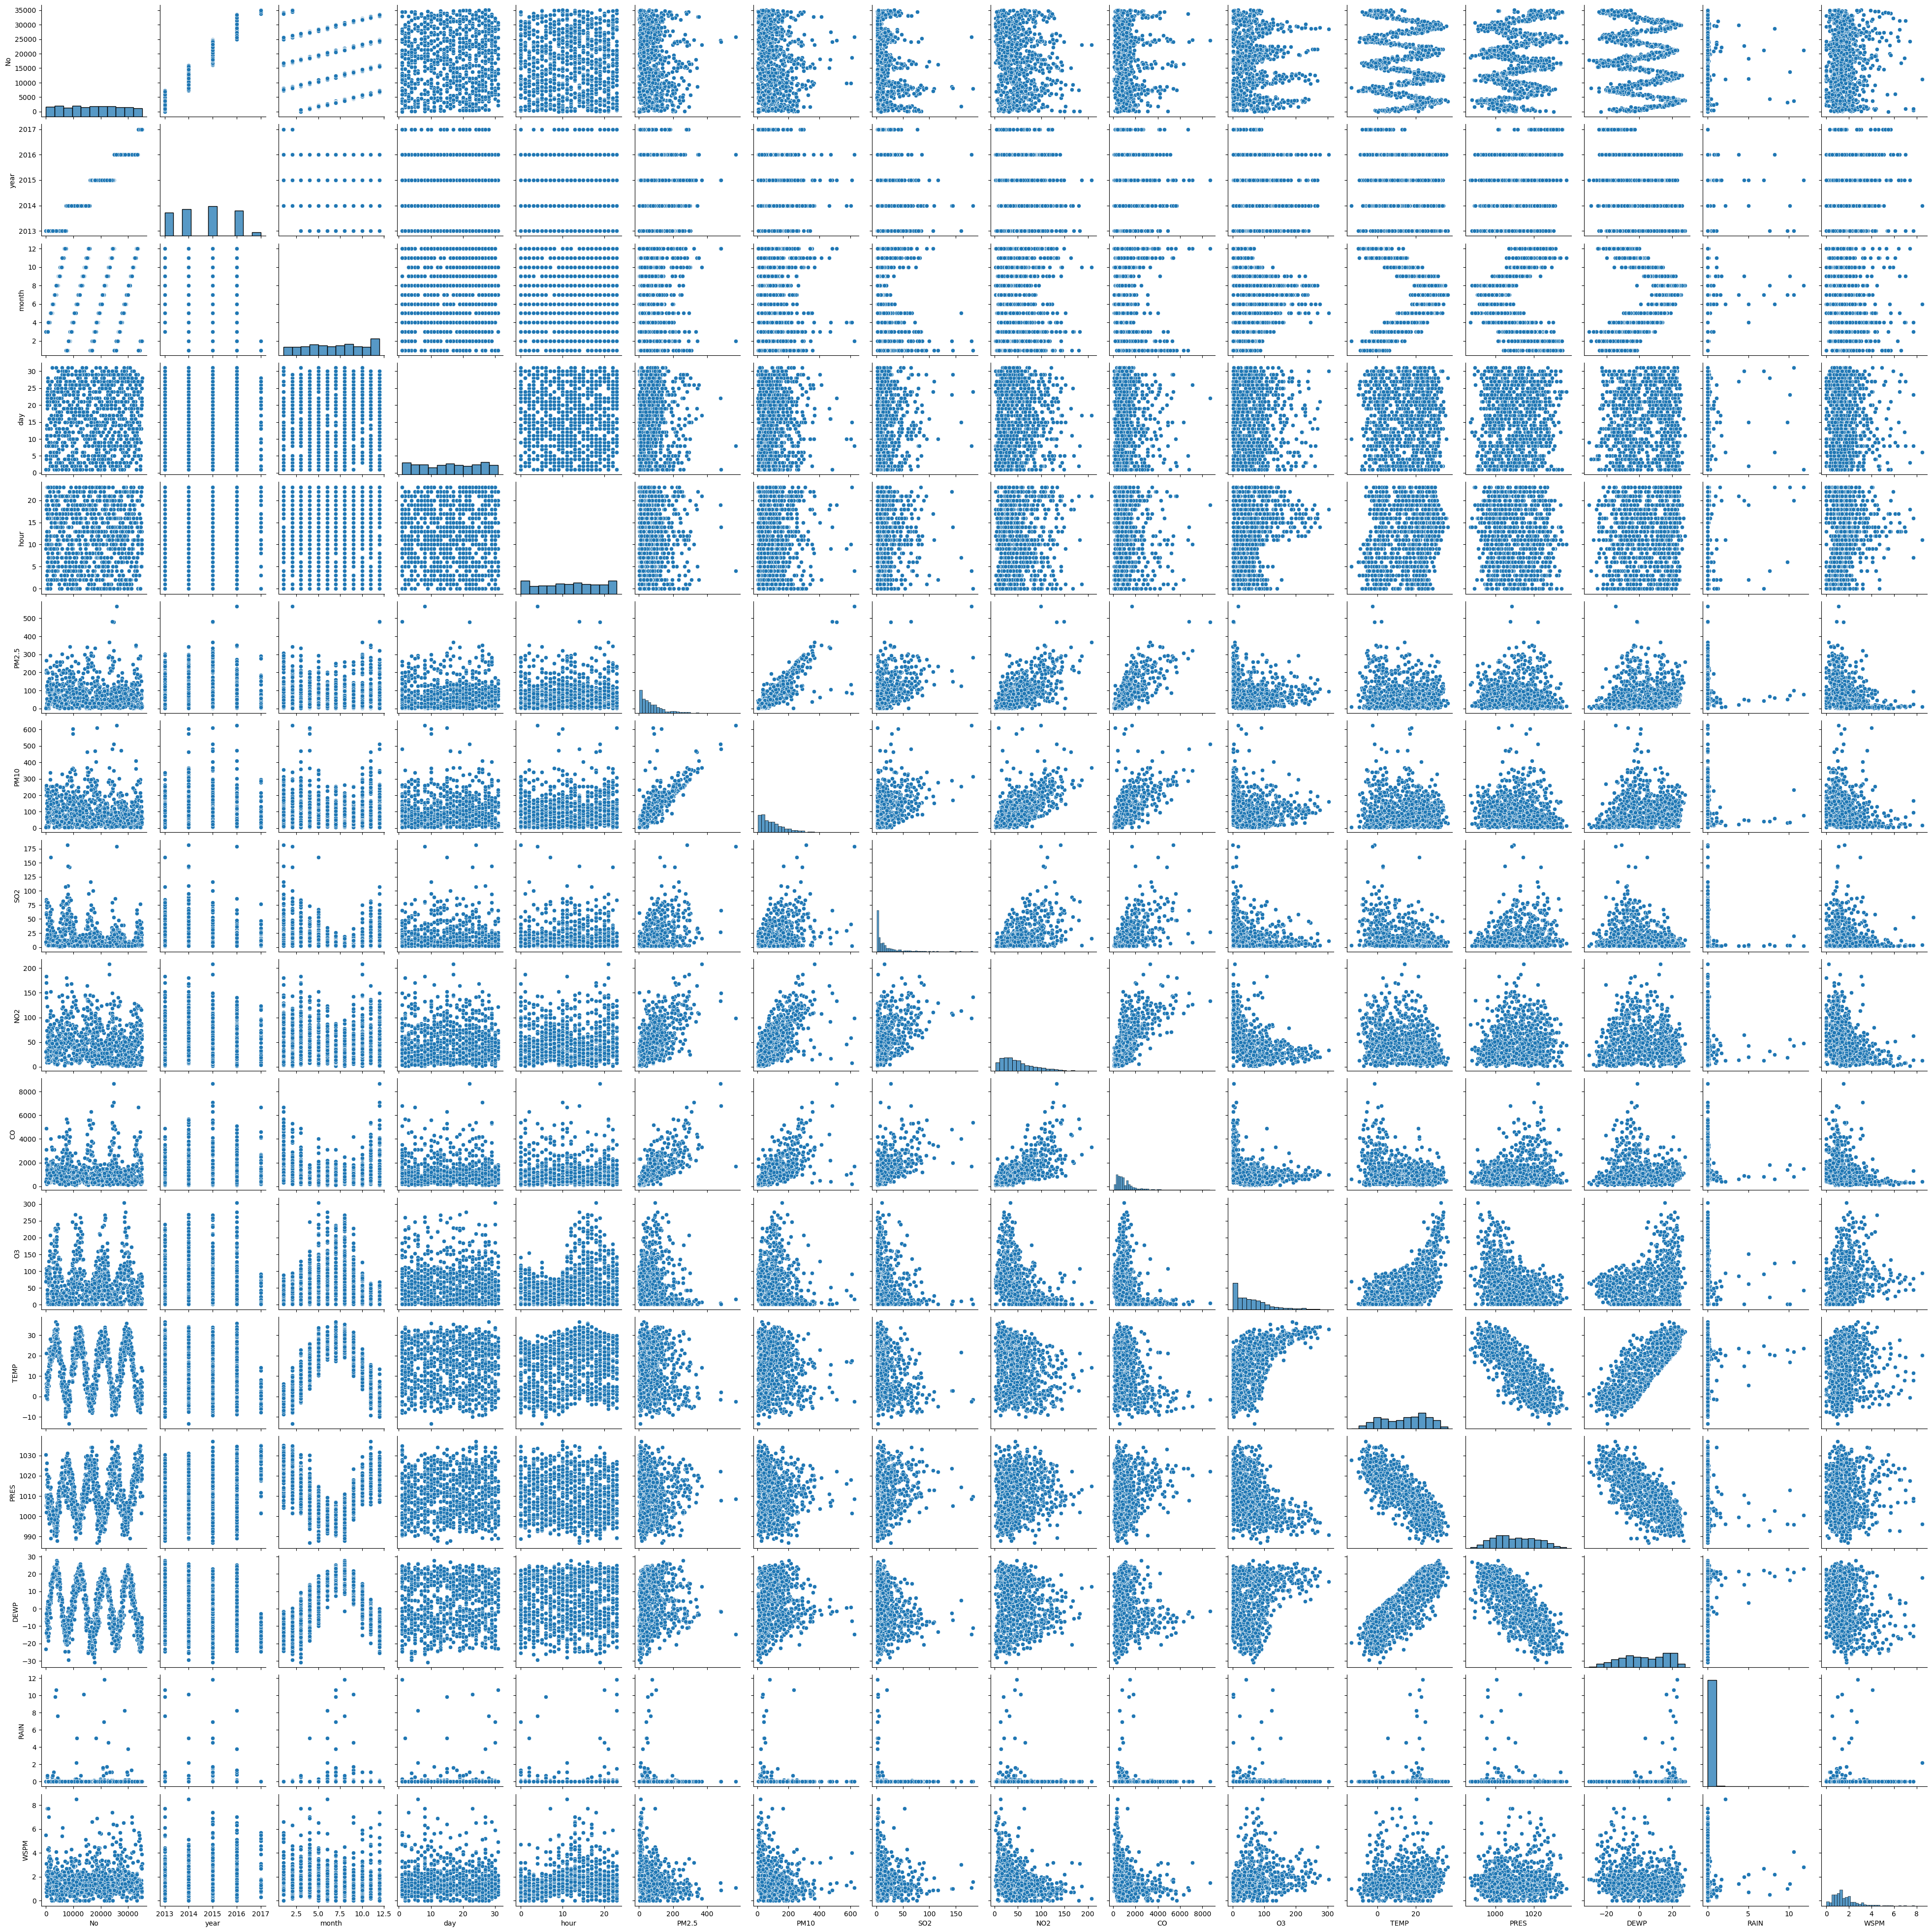

In [8]:
# Plot the distribution of quantitative features

sns.pairplot(df.sample(1000))
plt.show()

## 2. Preprocess 

* 2.1: Handle Missing Information
* 2.2: Handle Irrelevant Variables
* 2.3: Simplify Variables

In [9]:
# Check for null values in dataframe

print(df.isnull().sum())

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


In [10]:
# Check for zeros in dataframe

num_zero = [(df[column] == 0).sum() for column in df.columns]
print(num_zero)

[0, 0, 0, 0, 17532, 0, 0, 0, 0, 0, 0, 2739, 0, 832, 403858, 0, 11118, 0]


### 2.1: Handle Missing Information

In [11]:
# Impute missing values in numerical data using median

df['PM2.5'].fillna(df['PM2.5'].median(), inplace = True)
df['PM10'].fillna(df['PM10'].median(), inplace = True)
df['SO2'].fillna(df['SO2'].median(), inplace = True)
df['NO2'].fillna(df['NO2'].median(), inplace = True)
df['CO'].fillna(df['CO'].median(), inplace = True)
df['O3'].fillna(df['O3'].median(), inplace = True)
df['TEMP'].fillna(df['TEMP'].median(), inplace = True)
df['PRES'].fillna(df['PRES'].median(), inplace = True)
df['DEWP'].fillna(df['DEWP'].median(), inplace = True)
df['RAIN'].fillna(df['RAIN'].median(), inplace = True)
df['WSPM'].fillna(df['WSPM'].median(), inplace = True)

In [12]:
# Inpute missing values in categorical data using most frequent value

df['wd'] = df['wd'].fillna(df['wd'].value_counts().index[0])

In [13]:
# Double check if there are any NaN values remaining

print(df.isnull().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


### 2.2: Handle Irrelevant Variables

In [14]:
# Remove column number (No)

df = df.drop(['No'], axis = 1)

### 2.3: Simplify Variables

In [15]:
# Combine day, month and year columns into date column

col_to_date = ['year', 'month', 'day', 'hour']

df['date'] = pd.to_datetime(df[col_to_date])

## 3. Explore Data

In [16]:
# Look at the statistical data

df.describe()

year          month            day           hour  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean     2014.662560       6.522930      15.729637      11.500000   
std         1.177198       3.448707       8.800102       6.922195   
min      2013.000000       1.000000       1.000000       0.000000   
25%      2014.000000       4.000000       8.000000       5.750000   
50%      2015.000000       7.000000      16.000000      11.500000   
75%      2016.000000      10.000000      23.000000      17.250000   
max      2017.000000      12.000000      31.000000      23.000000   

               PM2.5           PM10            SO2            NO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       79.278489     104.256193      15.641507      50.418633   
std        80.056799      91.108745      21.455419      34.642023   
min         2.000000       2.000000       0.285600       1.026500   
25%        21.000000      36.000000       3.000000      24.000000   
50%        55.000000      82.000000       7.000000      43.000000   
75%       109.000000     144.000000      19.000000      70.000000   
max       999.000000     999.000000     500.000000     290.000000   

                  CO             O3           TEMP           PRES  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean     1214.493362      56.981874      13.539885    1010.746658   
std      1133.542988      55.802413      11.430768      10.469168   
min       100.000000       0.214200     -19.900000     982.400000   
25%       500.000000      12.000000       3.100000    1002.300000   
50%       900.000000      45.000000      14.500000    1010.400000   
75%      1500.000000      80.000000      23.200000    1019.000000   
max     10000.000000    1071.000000      41.600000    1042.800000   

                DEWP           RAIN           WSPM  
count  420768.000000  420768.000000  420768.000000  
mean        2.491405       0.064416       1.729461  
std        13.787252       0.820626       1.245947  
min       -43.400000       0.000000       0.000000  
25%        -8.900000       0.000000       0.900000  
50%         3.100000       0.000000       1.400000  
75%        15.100000       0.000000       2.200000  
max        29.100000      72.500000      13.200000

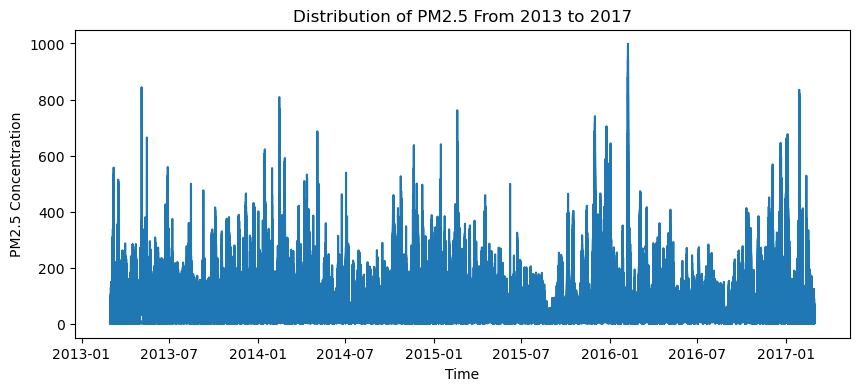

In [17]:
# Plot the distribution of PM2.5 across time

plt.figure(figsize = (10,4))
plt.plot(df['date'], df['PM2.5'])
plt.title('Distribution of PM2.5 From 2013 to 2017')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.show()

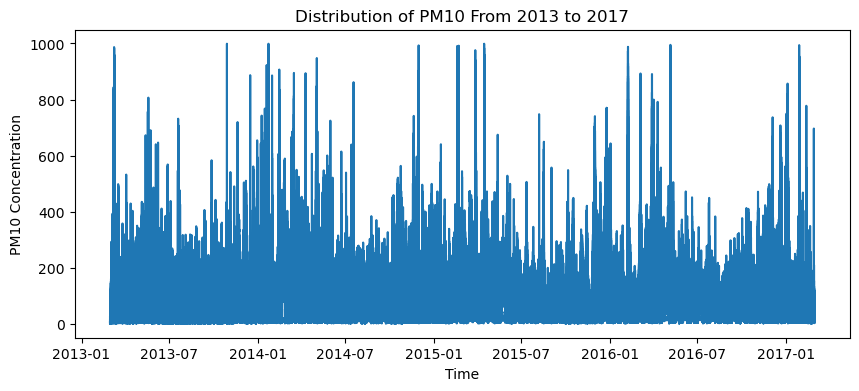

In [18]:
# Plot the distribution of PM10 across time

plt.figure(figsize = (10,4))
plt.plot(df['date'], df['PM10'])
plt.title('Distribution of PM10 From 2013 to 2017')
plt.xlabel('Time')
plt.ylabel('PM10 Concentration')
plt.show()

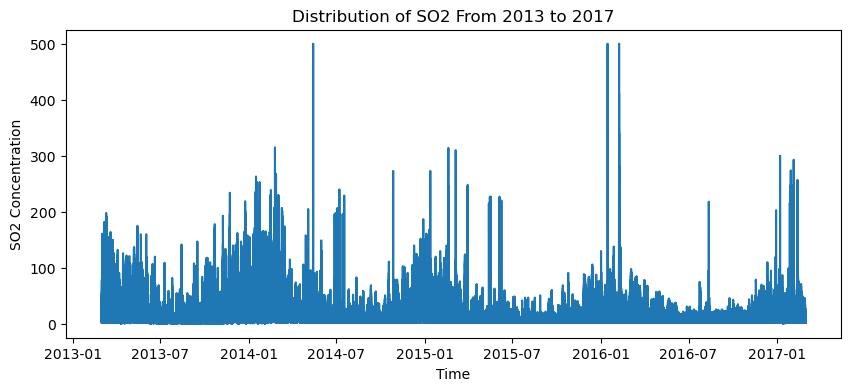

In [19]:
# Plot the distribution of SO2 across time

plt.figure(figsize = (10,4))
plt.plot(df['date'], df['SO2'])
plt.title('Distribution of SO2 From 2013 to 2017')
plt.xlabel('Time')
plt.ylabel('SO2 Concentration')
plt.show()

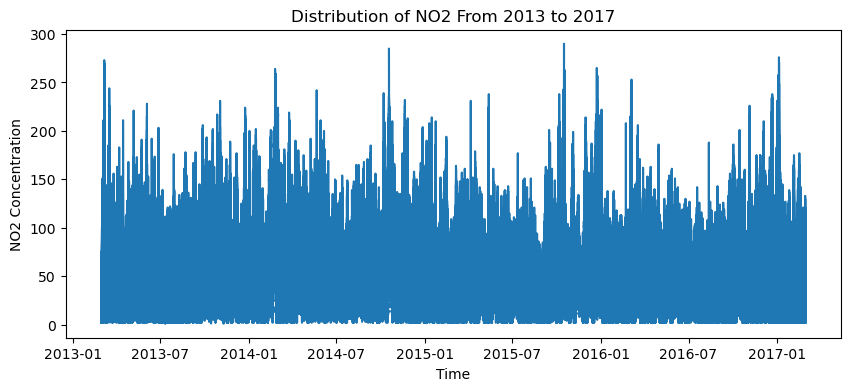

In [20]:
# Plot the distribution of NO2 across time

plt.figure(figsize = (10,4))
plt.plot(df['date'], df['NO2'])
plt.title('Distribution of NO2 From 2013 to 2017')
plt.xlabel('Time')
plt.ylabel('NO2 Concentration')
plt.show()

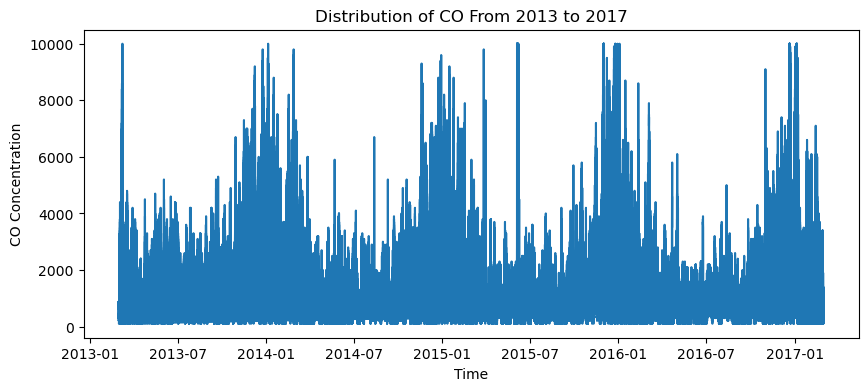

In [21]:
# Plot the distribution of CO across time

plt.figure(figsize = (10,4))
plt.plot(df['date'], df['CO'])
plt.title('Distribution of CO From 2013 to 2017')
plt.xlabel('Time')
plt.ylabel('CO Concentration')
plt.show()

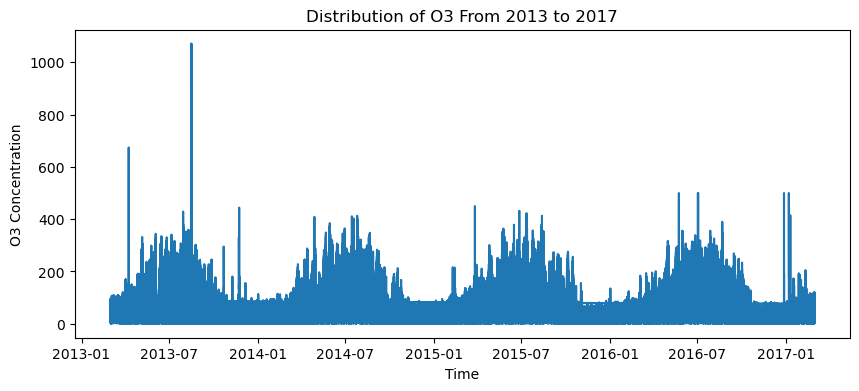

In [22]:
# Plot the distribution of O3 across time

plt.figure(figsize = (10,4))
plt.plot(df['date'], df['O3'])
plt.title('Distribution of O3 From 2013 to 2017')
plt.xlabel('Time')
plt.ylabel('O3 Concentration')
plt.show()

Text(0, 0.5, 'PM2.5 Concentration')

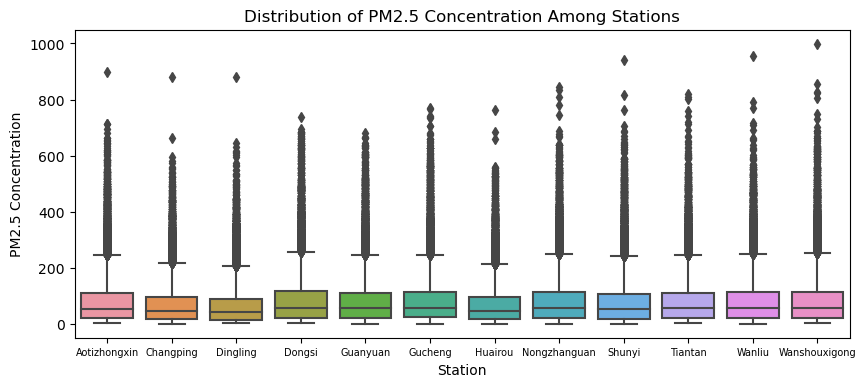

In [23]:
# Plot the distribution of PM2.5 concentration among stations

plt.figure(figsize = (10,4))
ax = sns.boxplot(x = df['station'], y = df['PM2.5'])
ax.xaxis.set_tick_params(labelsize = 7)
ax.set_title('Distribution of PM2.5 Concentration Among Stations')
ax.set_xlabel('Station')
ax.set_ylabel('PM2.5 Concentration')

Text(0, 0.5, 'PM10 Concentration')

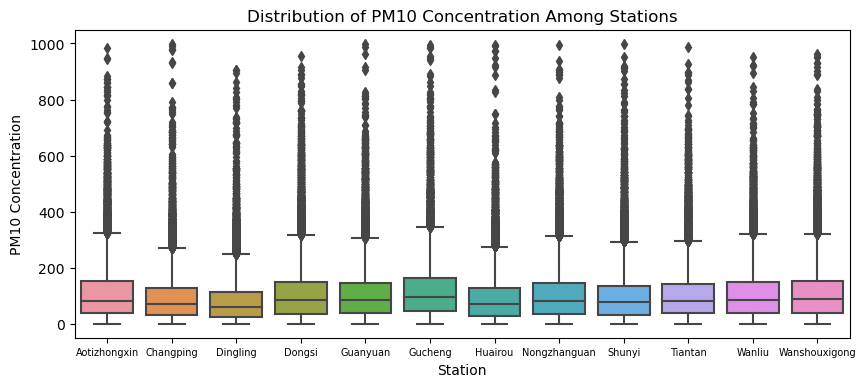

In [24]:
# Plot the distribution of PM2.5 concentration among stations

plt.figure(figsize = (10,4))
ax = sns.boxplot(x = df['station'], y = df['PM10'])
ax.xaxis.set_tick_params(labelsize = 7)
ax.set_title('Distribution of PM10 Concentration Among Stations')
ax.set_xlabel('Station')
ax.set_ylabel('PM10 Concentration')

Text(0, 0.5, 'SO2 Concentration')

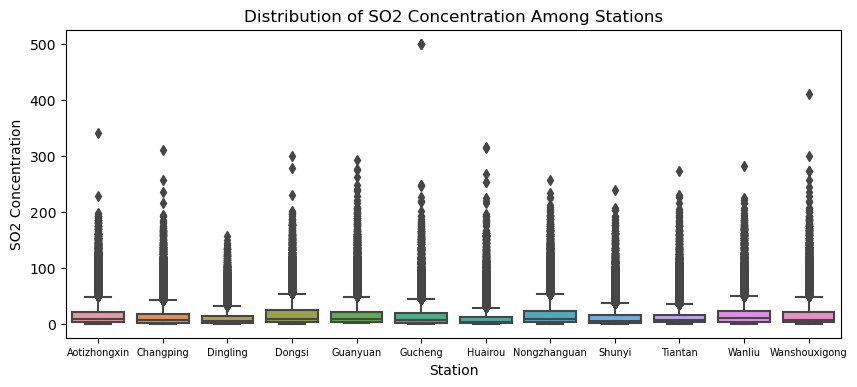

In [25]:
# Plot the distribution of SO2 concentration among stations

plt.figure(figsize=(10,4))
ax = sns.boxplot(x = df['station'], y = df['SO2'])
ax.xaxis.set_tick_params(labelsize = 7)
ax.set_title('Distribution of SO2 Concentration Among Stations')
ax.set_xlabel('Station')
ax.set_ylabel('SO2 Concentration')

Text(0, 0.5, 'NO2 Concentration')

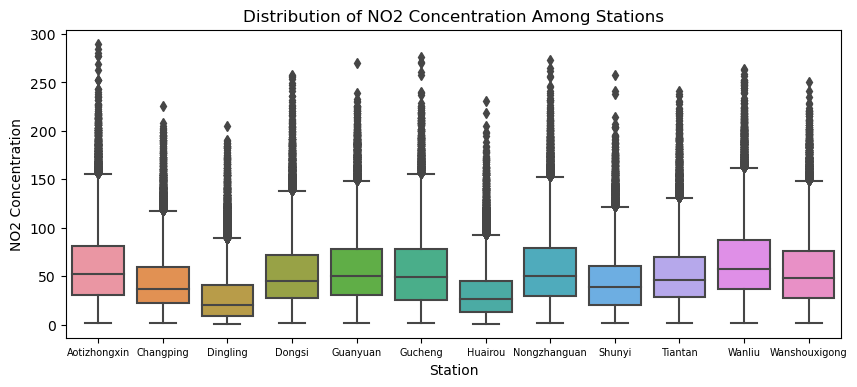

In [26]:
# Plot the distribution of NO2 concentration among stations

plt.figure(figsize=(10,4))
ax = sns.boxplot(x = df['station'], y = df['NO2'])
ax.xaxis.set_tick_params(labelsize = 7)
ax.set_title('Distribution of NO2 Concentration Among Stations')
ax.set_xlabel('Station')
ax.set_ylabel('NO2 Concentration')

Text(0, 0.5, 'CO Concentration')

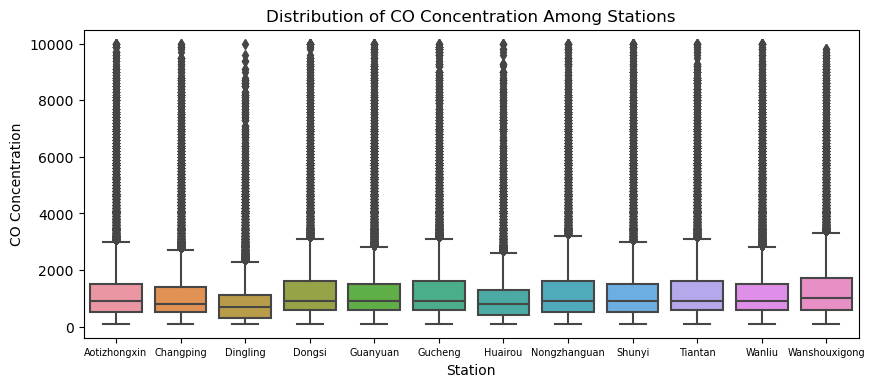

In [27]:
# Plot the distribution of CO concentration among stations

plt.figure(figsize=(10,4))
ax = sns.boxplot(x = df['station'], y = df['CO'])
ax.xaxis.set_tick_params(labelsize = 7)
ax.set_title('Distribution of CO Concentration Among Stations')
ax.set_xlabel('Station')
ax.set_ylabel('CO Concentration')

Text(0, 0.5, 'O3 Concentration')

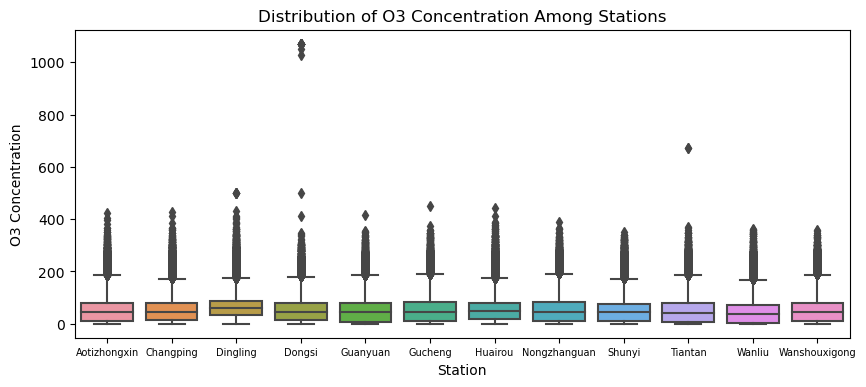

In [28]:
# Plot the distribution of O3 concentration among stations

plt.figure(figsize=(10,4))
ax = sns.boxplot(x = df['station'], y = df['O3'])
ax.xaxis.set_tick_params(labelsize = 7)
ax.set_title('Distribution of O3 Concentration Among Stations')
ax.set_xlabel('Station')
ax.set_ylabel('O3 Concentration')

### Observations

* PM2.5, PM10 and SO2 concentrations seem to be decreasing from 2013 to 2017.
* However, there are no visible changes in NO2, CO and O3 concentrations.
* Generally, the Dingling station has the lowest concentration of air pollutants, while the Aotizhongxin has the highest concentration of air pollutants.

## 4. Prepare Model

* 4.1: Create Dummy Variables
* 4.2: Take a Random Sample (Optional)
* 4.3: Split Data

In [29]:
# Remove date column (because cannot fit datetime dtype in model)

df = df.drop('date', axis = 1)

### 4.1: Create Dummy Variables

In [30]:
# Get dummy variables for categorical variables

df = pd.get_dummies(df, columns = ['wd', 'station'])

df.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'wd_E', 'wd_ENE',
       'wd_ESE', 'wd_N', 'wd_NE', 'wd_NNE', 'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE',
       'wd_SSE', 'wd_SSW', 'wd_SW', 'wd_W', 'wd_WNW', 'wd_WSW',
       'station_Aotizhongxin', 'station_Changping', 'station_Dingling',
       'station_Dongsi', 'station_Guanyuan', 'station_Gucheng',
       'station_Huairou', 'station_Nongzhanguan', 'station_Shunyi',
       'station_Tiantan', 'station_Wanliu', 'station_Wanshouxigong'],
      dtype='object')

### 4.2: Take a Random Sample (Optional)

* Please note that this is a small subset of the original dataset.
* This helps to speed up the cross validation step later on.
* Feel free to play around with n here!

In [31]:
# To quicken the training process, we will take a random sample of 100,000

df_2 = df.sample(n = 100000)

### 4.3: Split Data

In [32]:
# Set the X and y variables

X = df_2[df_2.columns[~df_2.columns.isin(['PM2.5'])]]

y = df_2['PM2.5']

In [33]:
# Split into 70% training set, 15% test set, 15% validation set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 5. Create Pipeline

* 5.1: Feature Engineering
* 5.2: Build Pipeline
* 5.3: Create Grid

In [34]:
# Import libraries

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import get_scorer_names
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [35]:
# Initialize regressors

kn = KNeighborsRegressor()
dt = DecisionTreeRegressor(criterion = 'squared_error', random_state = 3)
rf = RandomForestRegressor(max_depth = 6, random_state = 3)

### 5.1: Feature Engineering 

* Apply logarithmic transformation to right-skewed data (PM2.5, PM10, SO2, NO2, CO, O3).
* Apply standard scaler to K-Nearest Neighbors (does not affect the other models).

In [36]:
# Log transform the following features

df_2['PM2.5'] = np.log(df['PM2.5'])
df_2['PM10'] = np.log(df['PM10'])
df_2['SO2'] = np.log(df['SO2'])
df_2['NO2'] = np.log(df['NO2'])
df_2['CO'] = np.log(df['CO'])
df_2['O3'] = np.log(df['O3'])

### 5.2: Build Pipeline

* We only apply standard scaler to K-Nearest Neighbors because it has a distance metric.
* On the other hand, tree-based models, like Random Forest and Decision Trees, are not scale variant since they have a probability metric. Hence, we did not apply standard scaler on these models.

In [37]:
# Build pipeline
# Random forest and decision tree doesn't require scaler

pipe_kn = Pipeline([('std', StandardScaler()),
                    ('kn', kn)])

### 5.3: Create Grid

* In this step, we set up the hyperparameters that we will be tuning later on.
    * K-Nearest Neighbors: n neighbors and p-value
    * Decision Tree: max depth
    * Random Forest: n estimators 

In [38]:
# Create parameter grids

param_grid_kn = [{'kn__n_neighbors': list(range(1, 11)),
                    'kn__p': [1, 2]}]

param_grid_dt = [{'max_depth': list(range(1, 11))}]

param_grid_rf = [{'n_estimators': [1, 10, 100, 1000]}]

## 6. Select Model + Tune Hyperparameters + Estimate Errors

* 6.1: Create Grid Search objects
* 6.2: Perform nested cross validation

### 6.1: Create Grid Search Objects

* We set up one Grid Search object per model (3 total).
* If you would like to use multi-metric scoring:
    * Create a scoring list (eg. scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'] )
    * Within gcv, set scoring = scoring 
    * Set refit = 'r2' (or anything in the scoring list)

In [39]:
# Set up grid search objects

gridcvs = {}
inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 1)

for pgrid, est, name in zip((param_grid_kn, param_grid_dt, param_grid_rf),
                            (pipe_kn, dt, rf),
                            ('K-Nearest Neighbors', 'Decision Tree', 'Random Forest')):    
    gcv = GridSearchCV(estimator = est,
                       param_grid = pgrid,
                       scoring = 'r2',
                       n_jobs = -1,
                       cv = inner_cv,
                       verbose = 0,
                       refit = True)
    gridcvs[name] = gcv

### 6.2: Perform Nested Cross Validation

* Inner loop: 
    * This is where hyperparameter tuning and model selection takes place.
    * Each model is set with a certain combination of hyperparameters and trained with the training set.
    * The mean score is computed for each configuration.
* Outer loop: 
    * This is where error estimation takes place.
    * The best configuration is picked and the model is re-trained. The score is then computed.

In [40]:
# Nested cross validation

for name, gs_est in sorted(gridcvs.items()):

    print('Algorithm:', name)
    print('    Inner loop:')
    
    outer_scores = []
    outer_cv = KFold(n_splits = 3, shuffle = True, random_state = 1)
    
    
    for train_idx, valid_idx in outer_cv.split(X_train, y_train):
        
        # Inner loop
        gridcvs[name].fit(X_train.iloc[train_idx], y_train.iloc[train_idx]) 
        print('\n        Best Mean Score %.2f%%' % (gridcvs[name].best_score_ * 100))
        print('        Best parameters:', gridcvs[name].best_params_)
        
        # Outer loop
        outer_scores.append(gridcvs[name].best_estimator_.score(X_train.iloc[valid_idx], y_train.iloc[valid_idx]))
        print('        Score (on outer test fold) %.2f%%' % (outer_scores[-1] * 100))
    
    print('\n    Outer Loop:')
    print('        Score %.2f%% +/- %.2f \n' % (np.mean(outer_scores) * 100, np.std(outer_scores) * 100))

Algorithm: Decision Tree
    Inner loop:

        Best Mean Score 88.31%
        Best parameters: {'max_depth': 8}
        Score (on outer test fold) 88.67%

        Best Mean Score 88.46%
        Best parameters: {'max_depth': 8}
        Score (on outer test fold) 89.14%

        Best Mean Score 88.91%
        Best parameters: {'max_depth': 8}
        Score (on outer test fold) 88.74%

    Outer Loop:
        Score 88.85% +/- 0.21 

Algorithm: K-Nearest Neighbors
    Inner loop:

        Best Mean Score 74.07%
        Best parameters: {'kn__n_neighbors': 5, 'kn__p': 1}
        Score (on outer test fold) 75.46%

        Best Mean Score 74.16%
        Best parameters: {'kn__n_neighbors': 5, 'kn__p': 1}
        Score (on outer test fold) 76.07%

        Best Mean Score 74.30%
        Best parameters: {'kn__n_neighbors': 5, 'kn__p': 1}
        Score (on outer test fold) 74.91%

    Outer Loop:
        Score 75.48% +/- 0.47 

Algorithm: Random Forest
    Inner loop:

        Best Mean Scor

### 6.3: Train the Best Model

* The best-performing model and configuration is Random Forest with 1,000 n_estimators.
* We will proceed with training and testing respectively.

In [41]:
# Train the best model and its best hyperparameters

gcv_model_select = GridSearchCV(estimator = rf,
                                param_grid = param_grid_rf,
                                scoring = 'r2',
                                n_jobs = -1,
                                cv = inner_cv,
                                verbose = 1,
                                refit = True)

gcv_model_select.fit(X_train, y_train)
print('Best CV Score: %.2f%%' % (gcv_model_select.best_score_ * 100))
print('Best parameters:', gcv_model_select.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best CV Score: 89.04%
Best parameters: {'n_estimators': 1000}


In [42]:
# Compare the training score and test score

train_score = r2_score(y_true = y_train, y_pred = gcv_model_select.predict(X_train))
test_score = r2_score(y_true = y_test, y_pred = gcv_model_select.predict(X_test))

print('Training Score: %.2f%%' % (100 * train_score))
print('Test Score: %.2f%%' % (100 * test_score))

Training Score: 89.44%
Test Score: 87.85%


## Conclusion

* Overall, the concentration of pollutants in Beijing declined from 2013 to 2017.
* We used Nested Cross Validation to evaluate 3 models: K-Nearest Neighbors, Decision Tree and Random Forest. This allowed us to try out different hyperparameters for each model and gain a realistic (and not overly-optimistic) estimate on the models' performance.
* The best performing model configuration is the Random Forest regressor with 1,000 trees. This achieved a score of 89.44% with the training set and 87.85% with the test set.
* This means that, with more data from 2017 onwards, this model should be able to provide a decent level of prediction on the concentration of PM2.5 in Beijing.
* Moving forward, there are several improvements that can be made. Firstly, we can use the entire dataset instead of using a subset from a random sample. We can also try other models (like Support Vector Machine, etc) and tune a larger set of hyperparameters to achieve better optimisation.